<a href="https://colab.research.google.com/github/mukami3juma/Spam/blob/main/WEEK_9_SURVIVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET 1 PROJECT(SPAM)

## 1. Defining the Question

### a) Specifying the Question

We would like to have a predictive modeling solution to a problem that determines whether a passenger survived or not based on certain diagnostic measurements included in the provided dataset.

### b) Defining the Metric for Success

The model will be considered a success if it obtains an accuracy between 80%-90% as this range doesnt reflect under or overfitting.

### c) Understanding the context 

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We are therefore going to build a predictive classification model that determines the people that were more likely to survive based on passenger data (ie name, age, gender, socio-economic class, etc).

### d) Recording the Experimental Design

In order to work on the above problem we will:
1.) Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.) For this dataset, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification
3.) Compute the accuracy (percentage of correct classification)
4.) Report the confusion matrix of the classifier.
5.) Repeat step 1 and step 2 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of our modeling.
6.) Suggest and apply at least one of the optimization techniques learnt
7.) Provide further recommendations to improve both classifiers.

### e) Data Relevance

The relavance of our data is backed by the titanic dataset containing features that could render a passenger a survivor or not. It includes https://www.kaggle.com/c/titanic/data showing the aforementioned details and revealing that our dataset is sufficient and is from a reliable source.

## 2. Reading the Data

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [96]:
# LOADING DATASET
train_df = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test_df = pd.read_csv('https://archive.org/download/test1_202002/test%20%281%29.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3. Checking the Data

In [98]:
len(train_df)

891

In [99]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train_df.shape

(891, 12)

In [101]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 5. Tidying the Dataset

In [102]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [103]:
# check for duplicates
train_df.duplicated().sum()

0

In [104]:
# Identifying the Missing Data
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
# dealing with null values
train_df = train_df.fillna(value={'Age':train_df['Age'].mean(),'Cabin':'Unkown','Embarked':'Unknown'}, method=None, axis=None, inplace=False, limit=None, downcast=None)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unkown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unkown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unkown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unkown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unkown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [106]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [107]:
train_df.shape

(891, 12)

In [108]:
# Checking for Anomalies
for b in train_df:
  print(b,train_df[b].unique())

PassengerId [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

There are no anomalies detected in the data.

In [109]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [110]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


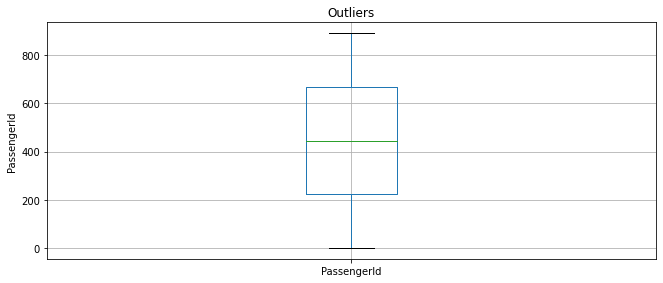

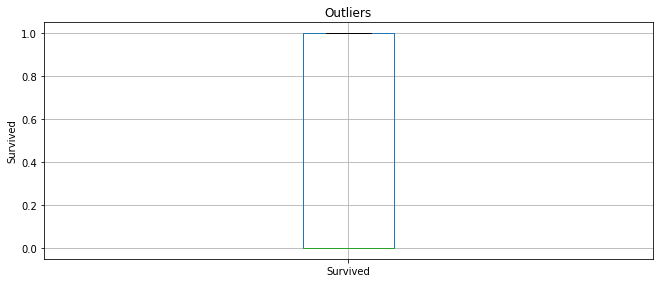

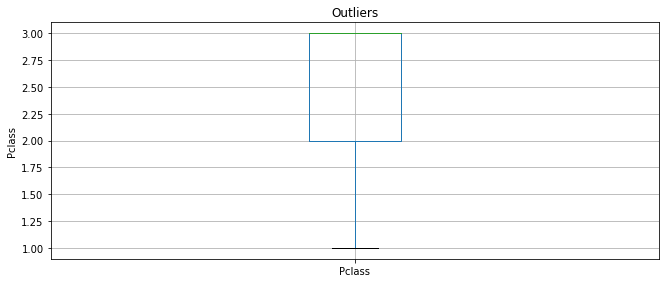

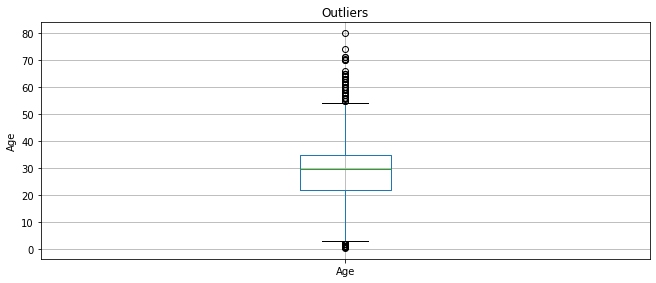

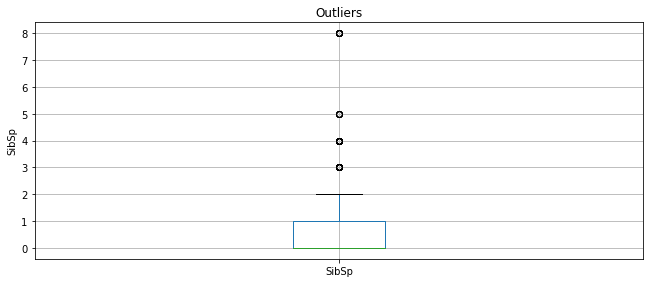

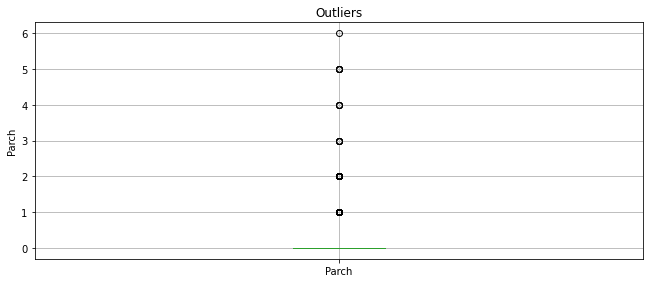

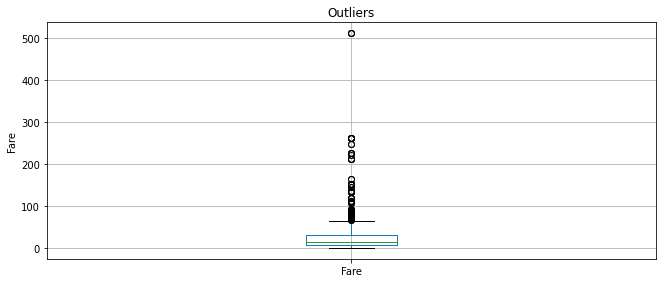

In [111]:
# Checking for Outliers
df = train_df[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']]
for i in df:
  plt.figure(figsize=(24,20))
  plt.subplot(4, 2, 1)
  fig = df.boxplot(column=i)
  fig.set_title('Outliers')
  fig.set_ylabel(i)


## 6. Exploratory Analysis

Univariate analysis

In [112]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

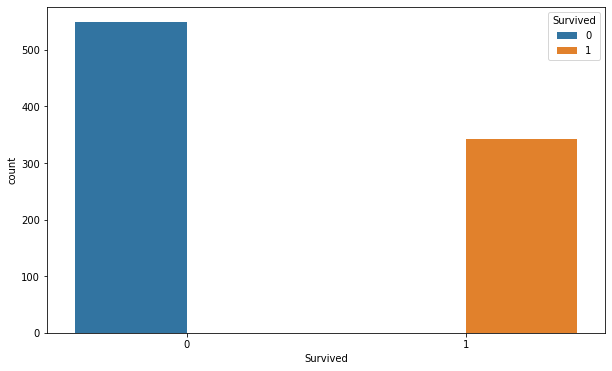

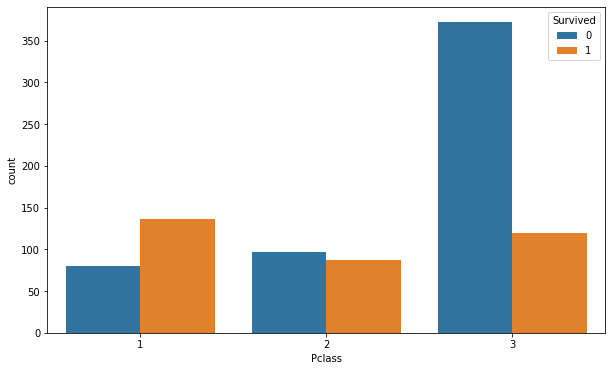

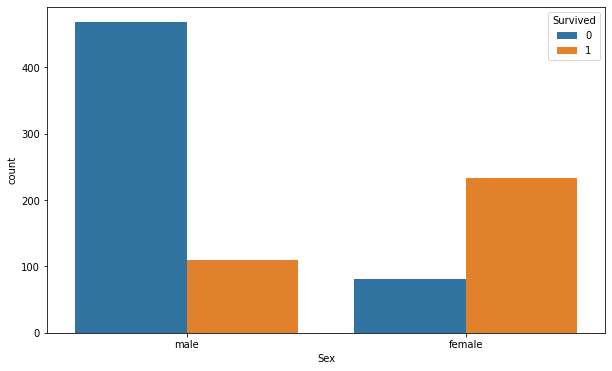

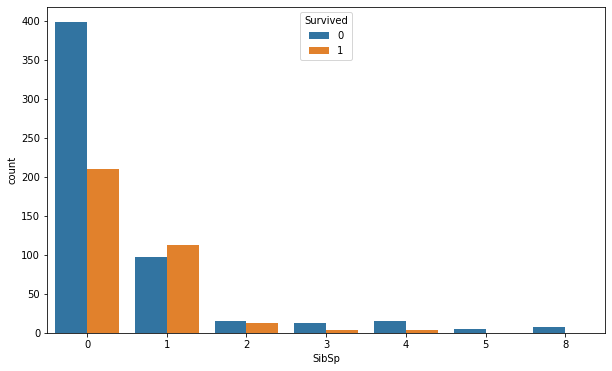

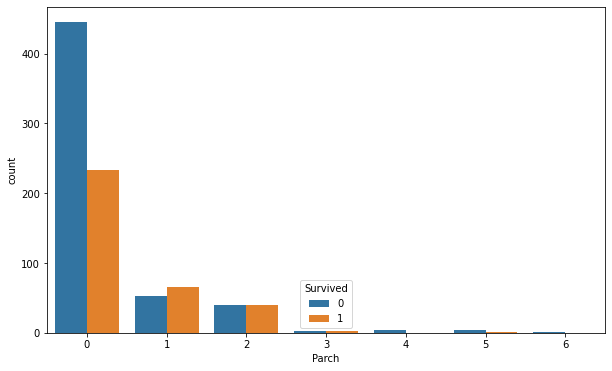

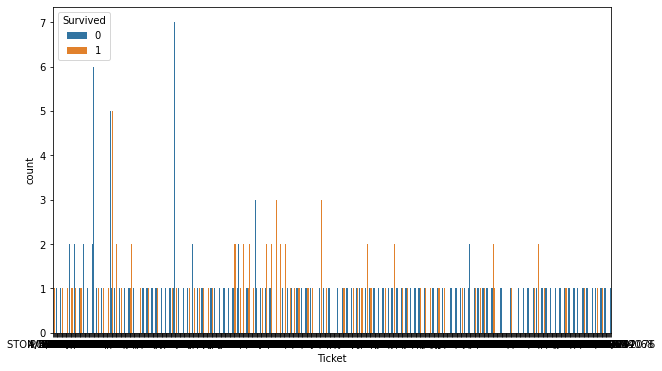

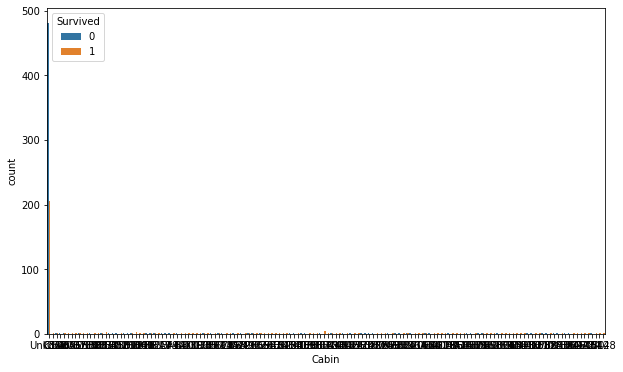

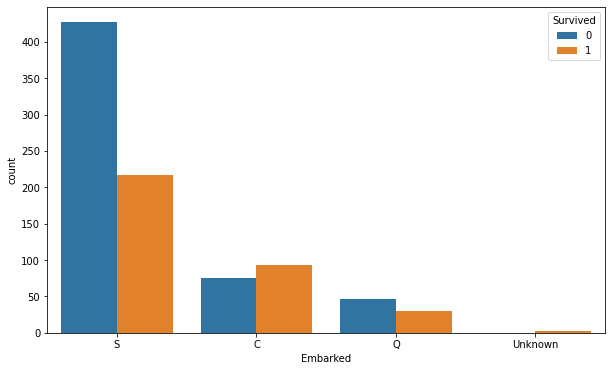

In [117]:
df = train_df[['Survived', 'Pclass', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked']]
for a in df:
  f, ax = plt.subplots(1,1,figsize=(10, 6))
  sns.countplot(x=a, hue='Survived', data=train_df, ax=None)

The above graphs show the frequencies of different features and their survival tendencies.

## Implementing the solution

In [118]:
# converting sex column datatype to 'category' and assigning it to another column
train_df['Sex_Cat'] = train_df['Sex'].astype('category').cat.codes
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unkown,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unkown,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unkown,S,1


In [119]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_Cat'],
      dtype='object')

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_Cat      891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(5)
memory usage: 84.5+ KB


In [141]:
# Import libaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

x = train_df[['PassengerId','Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Sex_Cat']]
y = train_df['Survived']
# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

ss = StandardScaler()
ss.fit(x_train)
x_train = ss.transform(x_train)
x_test = ss.transform(x_test)

In [142]:
# Training our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [143]:
# make predictions on our test data
y_pred = knn.predict(x_test)

In [128]:
print(accuracy_score(y_test,y_pred))

0.8212290502793296


The model correctly classifies a passenger as survivor or not 82.12% of the time according to the accuracy score.

In [144]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[97 13]
 [19 50]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [145]:
# repeating model building with different splitting percentages
# 70-30
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [146]:
# Training our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [147]:
# make predictions on our test data
y_pred = knn.predict(x_test)

In [148]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5970149253731343
[[129  39]
 [ 69  31]]
              precision    recall  f1-score   support

           0       0.65      0.77      0.70       168
           1       0.44      0.31      0.36       100

    accuracy                           0.60       268
   macro avg       0.55      0.54      0.53       268
weighted avg       0.57      0.60      0.58       268



Accuracy has gone down by over 20%

In [152]:
# 60-40
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [153]:
# Training our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [154]:
# make predictions on our test data
y_pred = knn.predict(x_test)

In [155]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6330532212885154
[[180  41]
 [ 90  46]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       221
           1       0.53      0.34      0.41       136

    accuracy                           0.63       357
   macro avg       0.60      0.58      0.57       357
weighted avg       0.61      0.63      0.61       357



Notice that the model's accuracy slightly increases with an increase in the test data.

## Optimization using LDA

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(x_train, y_train)
X_test = lda.transform(x_test)

In [157]:
# splitting dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [159]:
# Training our model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [160]:
# predicting
y_pred = knn.predict(x_test)

In [161]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6368715083798883
[[89 21]
 [44 25]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.73       110
           1       0.54      0.36      0.43        69

    accuracy                           0.64       179
   macro avg       0.61      0.59      0.58       179
weighted avg       0.62      0.64      0.62       179



The performance decreases to 64% compared to the first model's accuracy of 82%

The best decision would be to use the initial model that offers the best perfromance